<시계열 데이터 예측>

1. 시도표 그리기

In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
#fbprophet 시계열 예측을 위한 라이브러리
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [3]:
df = pd.read_csv('corona.csv', encoding='CP949')

In [4]:
df.columns=['date','confirmed']
df

,date,confirmed
0,2020. 1. 23.,1
1,2020. 1. 24.,1
2,2020. 1. 26.,1
3,2020. 1. 27.,1
4,2020. 1. 28.,0
...,...,...
219,2020. 8. 31.,248
220,2020. 9. 1.,235
221,2020. 9. 2.,267
222,2020. 9. 3.,195


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<Figure size 14400x14400 with 0 Axes>

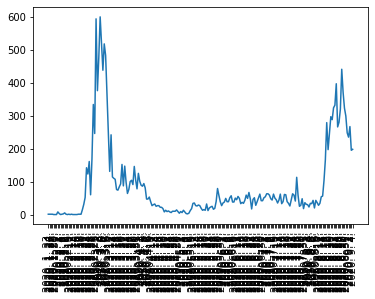

<Figure size 14400x14400 with 0 Axes>

In [5]:
# 데이터 전체(1/27-9/4) 추이 
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot('date','confirmed', data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

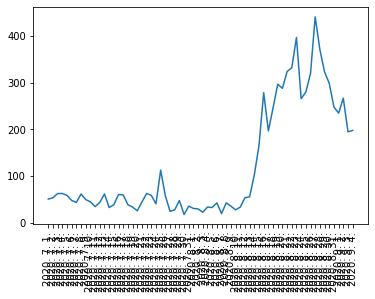

<Figure size 14400x14400 with 0 Axes>

In [9]:
# (7/1-9/4)
plt.plot(df.iloc[158:,0],df.iloc[158:,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

#Facebook Prophet 적용


In [10]:
# Facebook Prophet 예측 모델에 넣을 데이터프레임을 만들어준다.
#(날짜는 ds, 다른 변수는 y로 맞춰준다.)
confirmed_prophet = df.rename(columns={'date': 'ds','confirmed': 'y'})
confirmed_prophet.head()

,ds,y
0,2020. 1. 23.,1
1,2020. 1. 24.,1
2,2020. 1. 26.,1
3,2020. 1. 27.,1
4,2020. 1. 28.,0


In [11]:
#Prophet 객체 생성 후 fit
m=Prophet() 
m.fit(confirmed_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#예측할 미래 dataframe 생성 / 30일간의 미래 예측
future=m.make_future_dataframe(periods=30)
future
future.tail()
#9월 4일 기준이므로 10월 4일까지의 예측이 가능

,ds
249,2020-09-30
250,2020-10-01
251,2020-10-02
252,2020-10-03
253,2020-10-04


In [13]:
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
249,2020-09-30,192.102869,50.877059,336.784379,189.275138,194.990135,2.416698,2.416698,2.416698,2.416698,2.416698,2.416698,0.0,0.0,0.0,194.519567
250,2020-10-01,193.377350,63.396942,337.001568,190.332782,196.400480,0.543092,0.543092,0.543092,0.543092,0.543092,0.543092,0.0,0.0,0.0,193.920443
251,2020-10-02,194.651832,56.876142,332.473080,191.398382,197.824638,-0.047766,-0.047766,-0.047766,-0.047766,-0.047766,-0.047766,0.0,0.0,0.0,194.604065
252,2020-10-03,195.926313,81.405950,355.562665,192.488178,199.287823,19.838795,19.838795,19.838795,19.838795,19.838795,19.838795,0.0,0.0,0.0,215.765108
253,2020-10-04,197.200794,56.589404,330.213421,193.611263,200.795638,2.478778,2.478778,2.478778,2.478778,2.478778,2.478778,0.0,0.0,0.0,199.679572


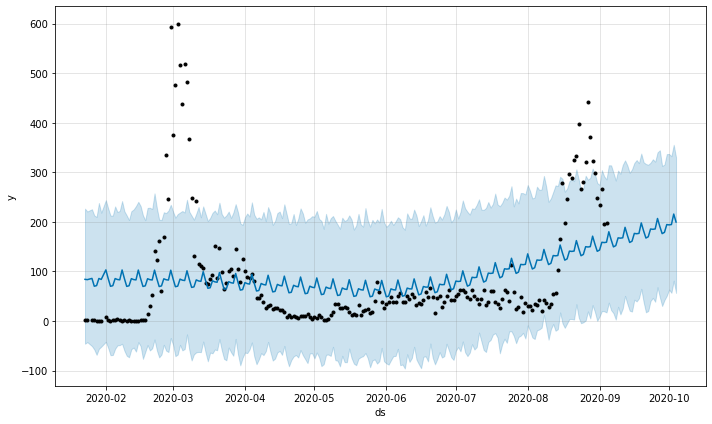

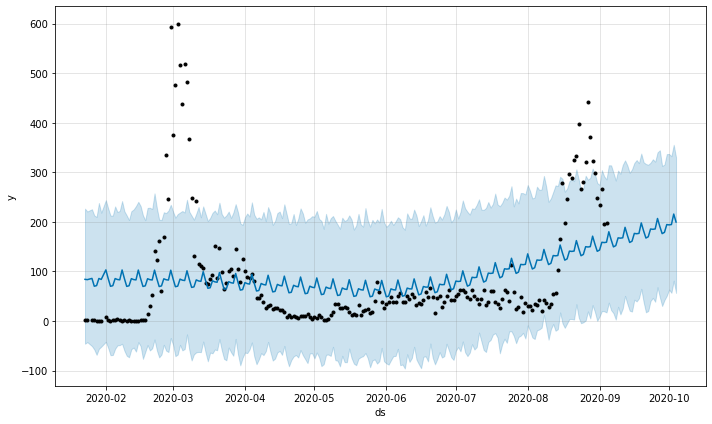

In [14]:
m.plot(forecast)

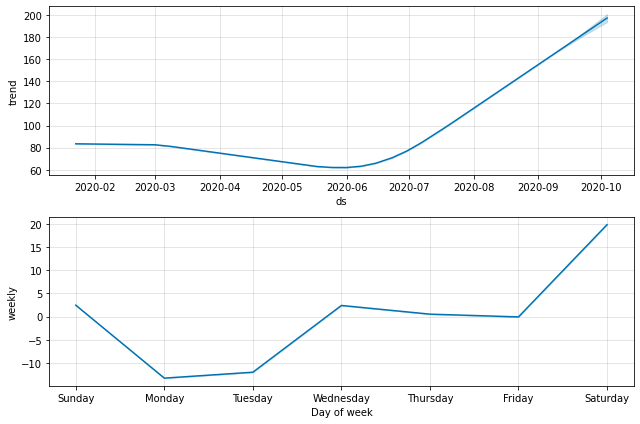

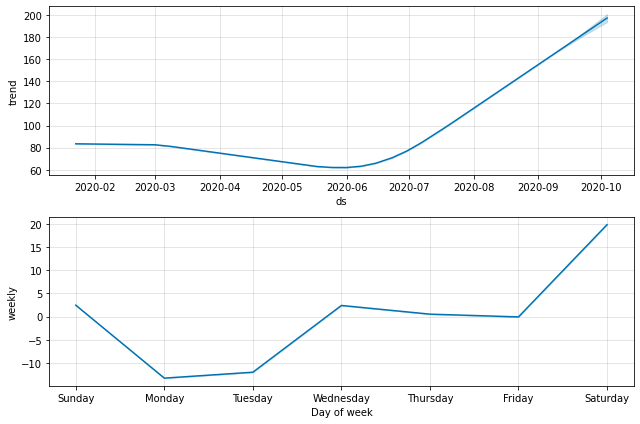

In [15]:
#forecast component를 시각화해준다(Trend, Weakly, Yearly)
m.plot_components(forecast)
#trend는 경향성/ weekly는 한 주의 일별 경향을 보여준다.

In [16]:
  #Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
m = Prophet(
    changepoint_prior_scale=0.2, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
    changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    
)

m.fit(confirmed_prophet)

#미래 dataframe
future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

#점이 없이 선만 있는 부분이 예측된 미래  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


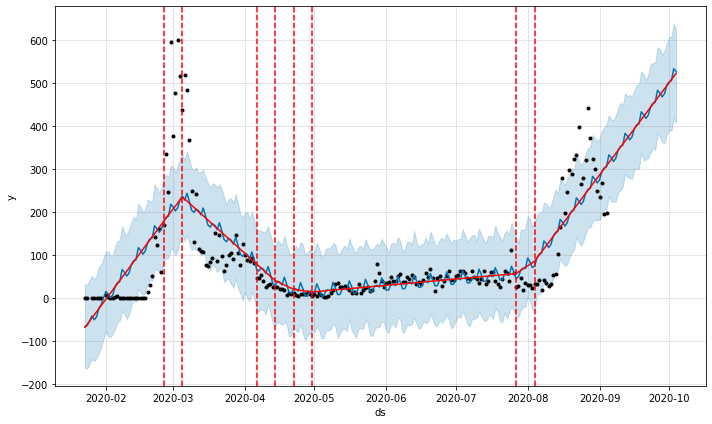

In [17]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다. 

#2. 사랑제일교회 집단 감염이 일어나지 않았을 시 예측


In [21]:
# (7/1-8/11)
ifcon = df[['date','confirmed']][158:200]
ifcon.head()

,date,confirmed
158,2020. 7. 1.,51
159,2020. 7. 2.,54
160,2020. 7. 3.,63
161,2020. 7. 4.,63
162,2020. 7. 5.,59


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Figure size 14400x14400 with 0 Axes>

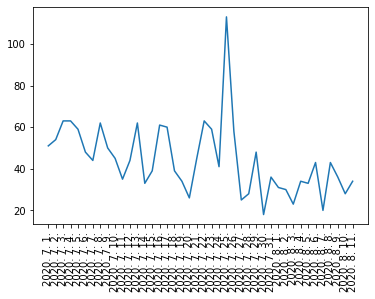

<Figure size 14400x14400 with 0 Axes>

In [22]:
#dataframe값들로 확진자 증감 시도표 그리기
plt.plot(df.iloc[158:200,0],df.iloc[158:200,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

In [23]:
#fbprophet을 위한 dataframe
ifcon_prophet = ifcon.rename(columns={'date': 'ds','confirmed': 'y'})
ifcon_prophet.tail()

,ds,y
195,2020. 8. 7.,20
196,2020. 8. 8.,43
197,2020. 8. 9.,36
198,2020. 8. 10.,28
199,2020. 8. 11.,34


In [24]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet()
m.fit(ifcon_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
#예측할 미래 dataframe 만들기(30일)
future=m.make_future_dataframe(periods=30)
future
future.tail()

,ds
67,2020-09-06
68,2020-09-07
69,2020-09-08
70,2020-09-09
71,2020-09-10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


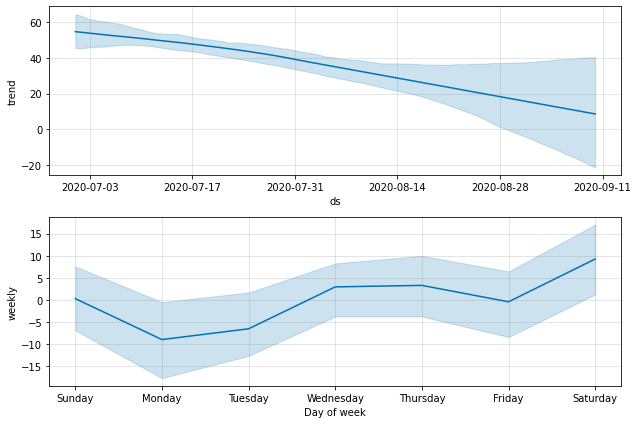

In [26]:
##교회 집단감염 전의 데이터에 불확실성을 추가해준다.
#불확실성의 범위 보기
forecast = Prophet(interval_width=0.95).fit(ifcon_prophet).predict(future)
#시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함,mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻
m = Prophet(mcmc_samples=28)
forecast = m.fit(ifcon_prophet).predict(future)
fig = m.plot_components(forecast)
#불투명한 구간이 불확실한 오차구간

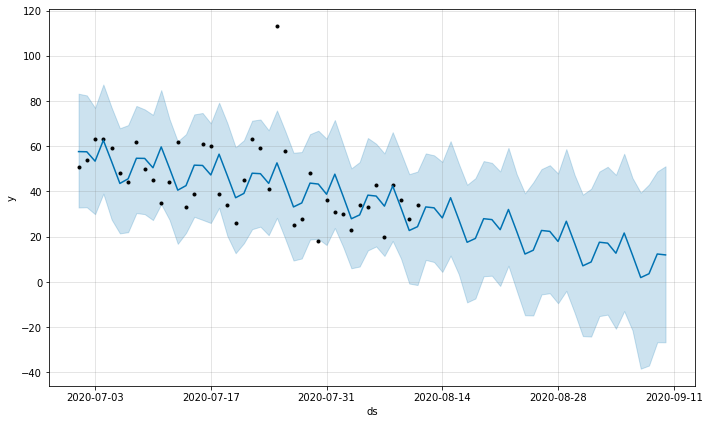

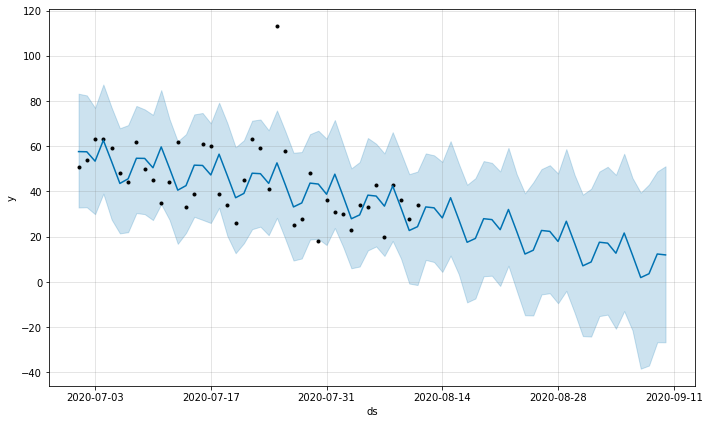

In [27]:
m.plot(forecast)

In [28]:
#예측모델 시각화
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible 디폴트는 0.05
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    
)

m.fit(ifcon_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


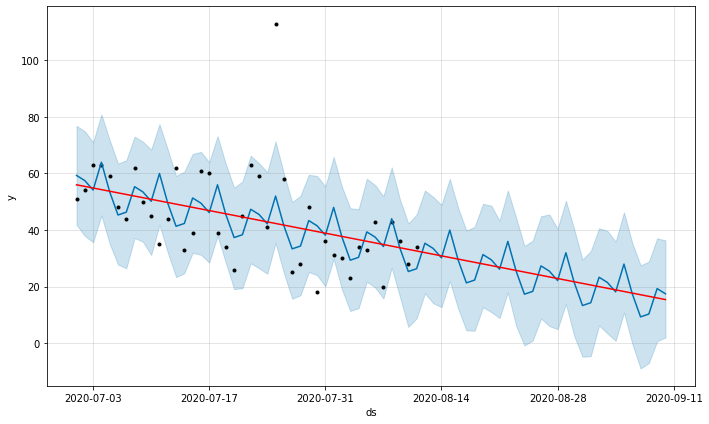

In [29]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend